In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.api as sm
from statsmodels.formula.api import ols


In [2]:
life_data= pd.read_csv('Life Expectancy Data.csv')

In [3]:
life_data.describe()
life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
life_data['Adult Mortality'].unique()

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

here you are checking for Nan values first, you noticed that your charting (scatter matrix)was not working so decided to look at the cleaniness 
of the data so that you would be able to see if it has to do will nan values. 

In [5]:
life_data.head
for item in life_data.columns:
    var=life_data[item].isnull().values.any()
#     print(life_data[item].unique())
    print(item +"--"+str(var))
    

Country--False
Year--False
Status--False
Life expectancy --True
Adult Mortality--True
infant deaths--False
Alcohol--True
percentage expenditure--False
Hepatitis B--True
Measles --False
 BMI --True
under-five deaths --False
Polio--True
Total expenditure--True
Diphtheria --True
 HIV/AIDS--False
GDP--True
Population--True
 thinness  1-19 years--True
 thinness 5-9 years--True
Income composition of resources--True
Schooling--True


In [6]:

place=life_data.loc[(life_data['Adult Mortality'] != 'nan')& (life_data['Alcohol'] != 'nan')&(life_data['Life expectancy '] != 'nan')&(life_data['Hepatitis B'] != 'nan')&(life_data[' BMI '] != 'nan')]

place['Adult Mortality'].unique()
# life_data[life_data[Status] != 'nan']

array([263., 271., 268., 272., 275., 279., 281., 287., 295., 291., 293.,
         3., 316., 321.,  74.,   8.,  84.,  86.,  88.,  91.,   1.,   9.,
        99.,  15.,  17.,  18.,  14.,  11.,  19., 112., 113., 116., 119.,
       123., 126., 129., 132., 136., 146., 145., 335., 348., 355., 358.,
       361., 365., 369., 371., 375., 381., 382., 386., 388., 391.,  44.,
        48.,  13., 131., 133., 134., 138., 142., 144., 147., 149., 151.,
       153., 154., 156., 118.,  12., 121., 127., 137., 128., 141.,  59.,
         6.,  61.,  63.,  64.,  66.,  67.,  69.,  71.,  73.,  75.,  78.,
        65.,  68.,   7.,  77.,  76.,  81.,  85.,  92.,  96., 125., 162.,
        16., 172., 167., 161., 168., 171., 174., 189., 192.,  79.,  83.,
        87., 135., 152., 155., 158., 164., 173.,  98., 111., 115., 117.,
       196., 199.,  23., 194., 232., 222., 226., 224., 243., 252., 247.,
       253., 262., 254.,  89.,  95., 175., 177., 188., 186., 184., 181.,
       191., 197.,  21., 249., 251., 259., 278., 28

In [7]:
data_sin_nan=life_data.dropna()


In [8]:
## now recheck the data for null values and missing data with same for loop
for item in place.columns:
    var=data_sin_nan[item].isnull().values.any()
    print(data_sin_nan[item].unique())
    print(item +"--"+str(var))

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'Nicaragua' 'N

In [14]:
data_sin_nan.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


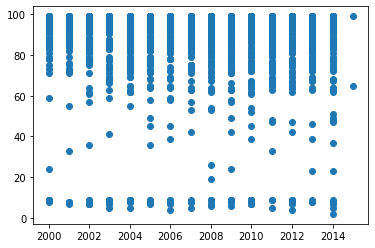

In [9]:
plt.scatter(data_sin_nan['Year'],data_sin_nan['Diphtheria '])
    

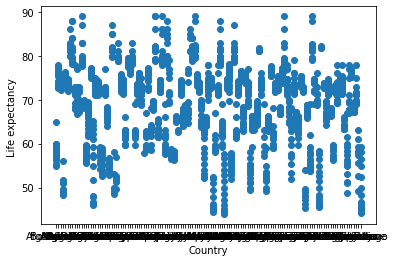

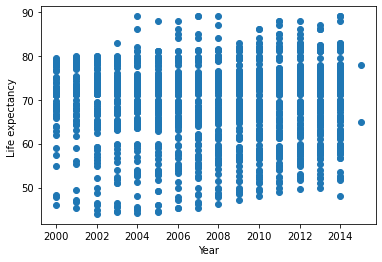

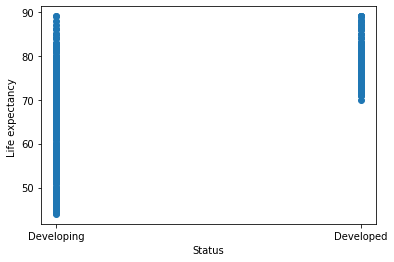

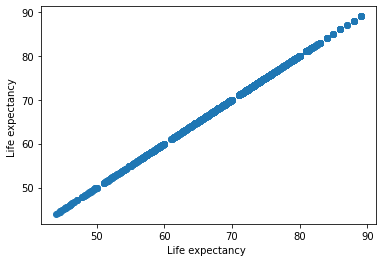

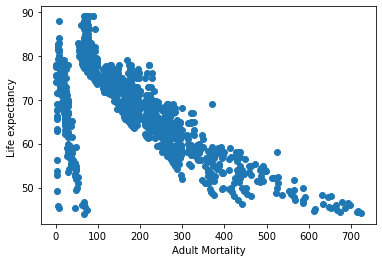

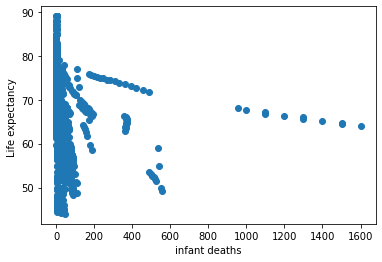

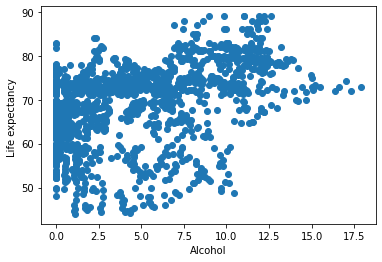

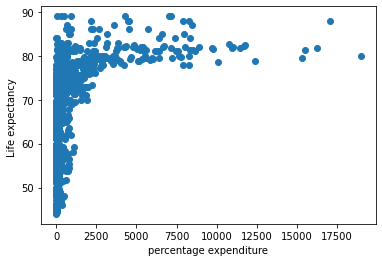

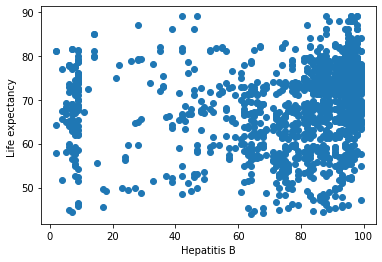

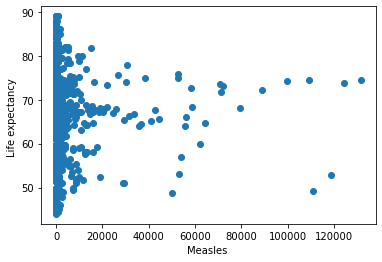

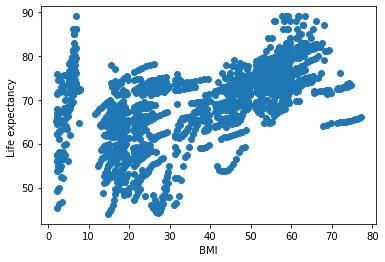

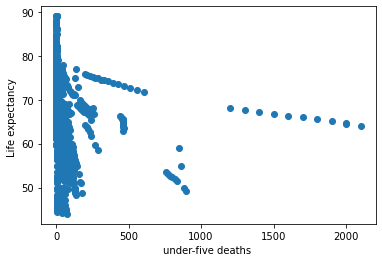

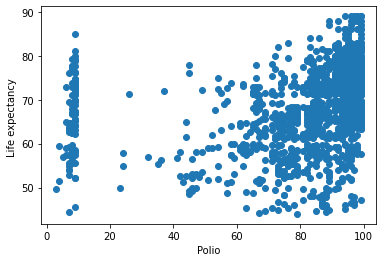

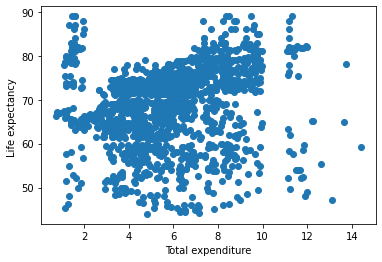

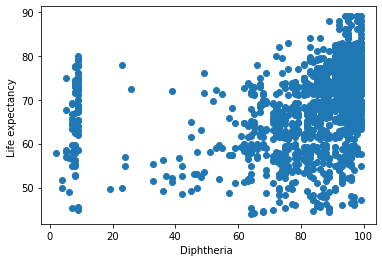

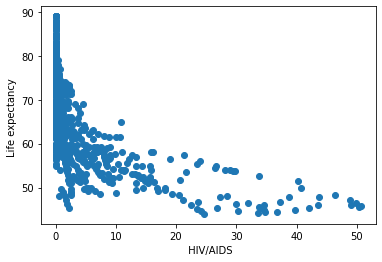

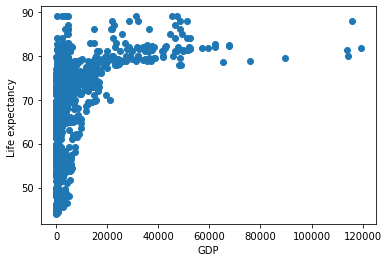

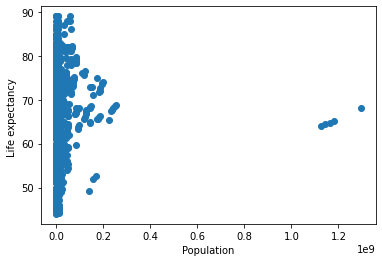

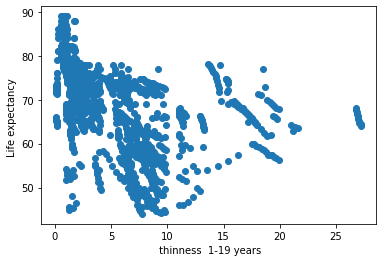

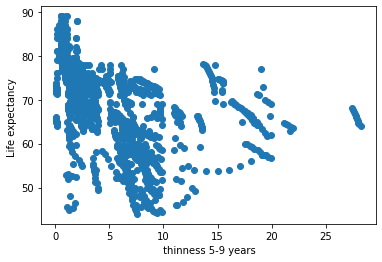

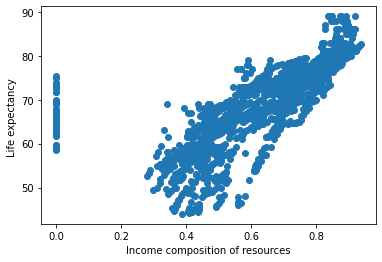

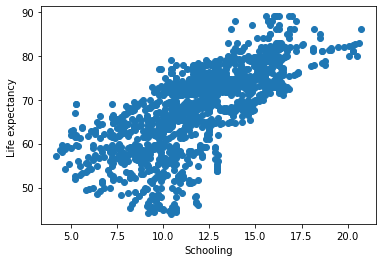

In [10]:
#clean this up so that you are only picking the  continues variables
#this is good for now just grab the plots that you needd
col_name=data_sin_nan.columns
for pos, var1 in enumerate(col_name):
    
    plt.scatter(data_sin_nan[var1],data_sin_nan['Life expectancy '])
    plt.xlabel(var1)
    plt.ylabel('Life expectancy ')
    plt.show()

In [11]:
cat_only=data_sin_nan.loc[:,data_sin_nan.columns.difference (['Country','Year','Status'])]
cat_only

,BMI,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Adult Mortality,Alcohol,Diphtheria,GDP,Hepatitis B,Income composition of resources,Life expectancy,Measles,Polio,Population,Schooling,Total expenditure,infant deaths,percentage expenditure,under-five deaths
0,19.1,0.1,17.2,17.3,263.0,0.01,65.0,584.259210,65.0,0.479,65.0,1154,6.0,33736494.0,10.1,8.16,62,71.279624,83
1,18.6,0.1,17.5,17.5,271.0,0.01,62.0,612.696514,62.0,0.476,59.9,492,58.0,327582.0,10.0,8.18,64,73.523582,86
2,18.1,0.1,17.7,17.7,268.0,0.01,64.0,631.744976,64.0,0.470,59.9,430,62.0,31731688.0,9.9,8.13,66,73.219243,89
3,17.6,0.1,17.9,18.0,272.0,0.01,67.0,669.959000,67.0,0.463,59.5,2787,67.0,3696958.0,9.8,8.52,69,78.184215,93
4,17.2,0.1,18.2,18.2,275.0,0.01,68.0,63.537231,68.0,0.454,59.2,3013,68.0,2978599.0,9.5,7.87,71,7.097109,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,27.1,33.6,9.4,9.4,723.0,4.36,65.0,454.366654,68.0,0.407,44.3,31,67.0,12777511.0,9.2,7.13,27,0.000000,42
2934,26.7,36.7,9.8,9.9,715.0,4.06,68.0,453.351155,7.0,0.418,44.5,998,7.0,12633897.0,9.5,6.52,26,0.000000,41
2935,26.3,39.8,1.2,1.3,73.0,4.43,71.0,57.348340,73.0,0.427,44.8,304,73.0,125525.0,10.0,6.53,25,0.000000,40
2936,25.9,42.1,1.6,1.7,686.0,1.72,75.0,548.587312,76.0,0.427,45.3,529,76.0,12366165.0,9.8,6.16,25,0.000000,39


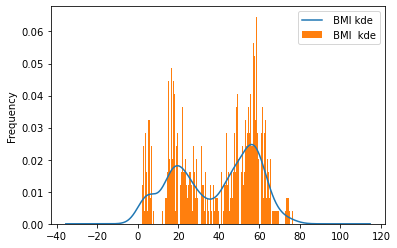

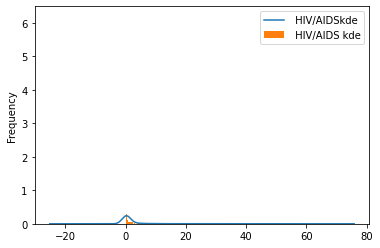

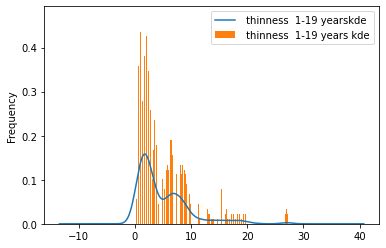

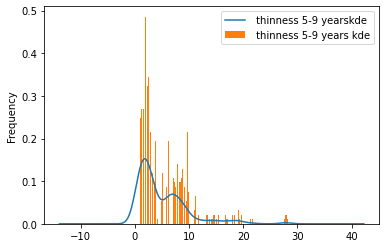

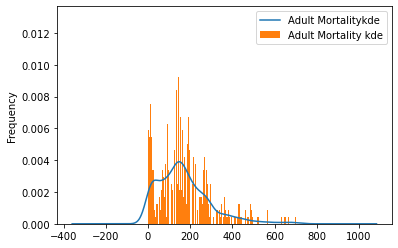

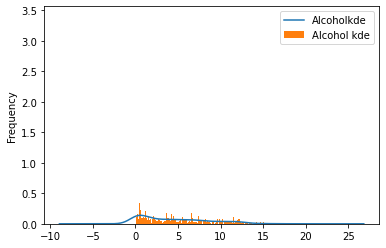

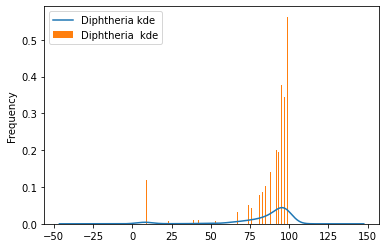

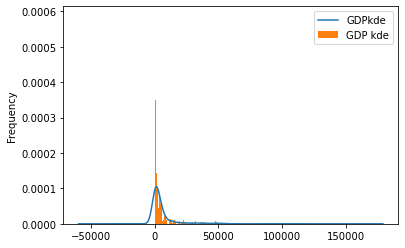

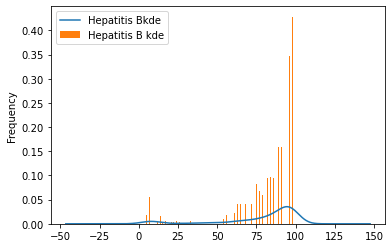

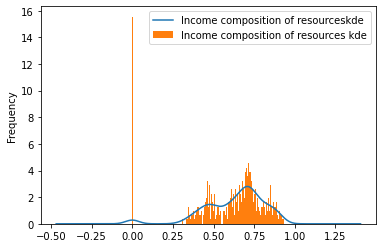

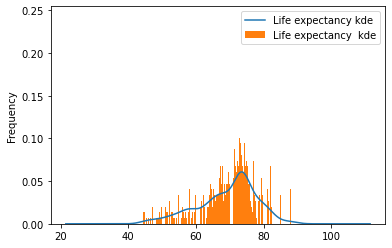

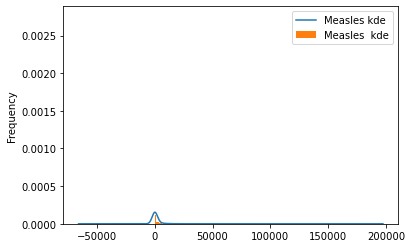

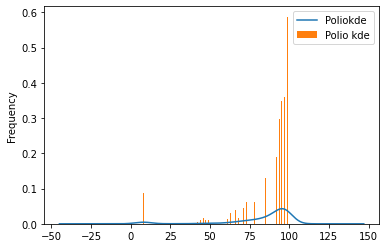

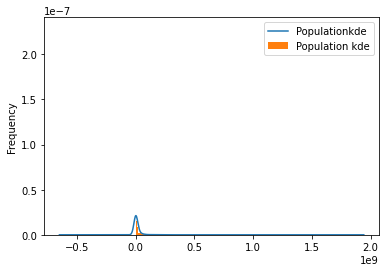

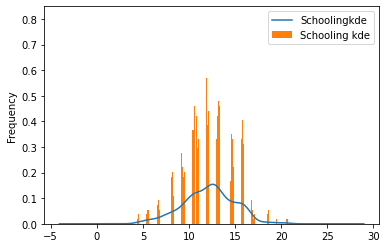

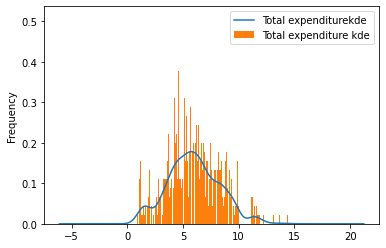

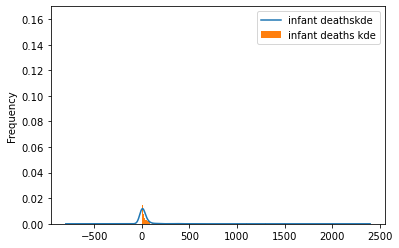

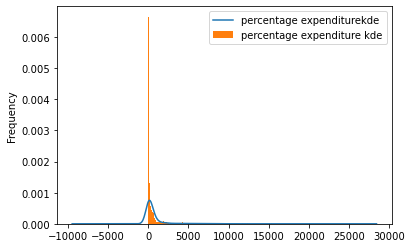

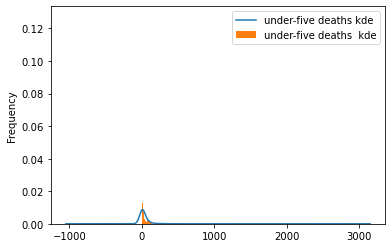

In [25]:
for col in cat_only[1:]:
    cat_only[col].plot.kde(label=col+ 'kde')
    cat_only[col].plot.hist(density=True,label =col+' kde',bins=500)
    plt.legend()
    plt.show()

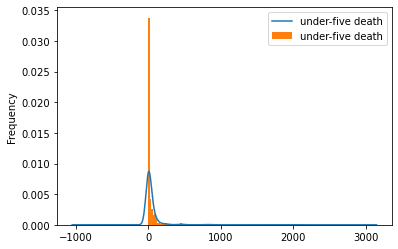

In [40]:
cat_only['under-five deaths '].plot.kde(label='under-five death')
cat_only['under-five deaths '].plot.hist(density=True,label ='under-five death', bins=100)
plt.legend()
plt.show()

In [44]:
f ='Life expectancy~Adult Mortality+infant deaths+Alcohol+percentage expenditure+Hepatitis B+Measles + BMI +under-five deaths +Polio+Total expenditure+Diphtheria + HIV/AIDS+GDP+Population+ thinness  1-19 years+ thinness 5-9 years+Income composition of resources+Schooling'
model = ols(formula=f, data=cat_only).fit()

SyntaxError: invalid syntax (<unknown>, line 1)